# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

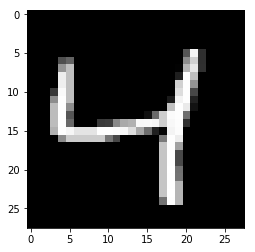

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784], 'inputs')
targets_ = tf.placeholder(tf.float32, [None, 784], 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6807
Epoch: 1/20... Training loss: 0.6757
Epoch: 1/20... Training loss: 0.6688
Epoch: 1/20... Training loss: 0.6613
Epoch: 1/20... Training loss: 0.6523
Epoch: 1/20... Training loss: 0.6418
Epoch: 1/20... Training loss: 0.6296
Epoch: 1/20... Training loss: 0.6152
Epoch: 1/20... Training loss: 0.6034
Epoch: 1/20... Training loss: 0.5859
Epoch: 1/20... Training loss: 0.5691
Epoch: 1/20... Training loss: 0.5528
Epoch: 1/20... Training loss: 0.5364
Epoch: 1/20... Training loss: 0.5194
Epoch: 1/20... Training loss: 0.4982
Epoch: 1/20... Training loss: 0.4812
Epoch: 1/20... Training loss: 0.4597
Epoch: 1/20... Training loss: 0.4446
Epoch: 1/20... Training loss: 0.4262
Epoch: 1/20... Training loss: 0.4145
Epoch: 1/20... Training loss: 0.3942
Epoch: 1/20... Training loss: 0.3802
Epoch: 1/20... Training loss: 0.3693
E

Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1782
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1768
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1775
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1841
E

Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1535
E

Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1324
E

Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1192
E

Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1138
E

Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1121
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1066
E

Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1087
E

Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1022
E

Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0971
E

Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0935
E

Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0897
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0898
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0877
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0949


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

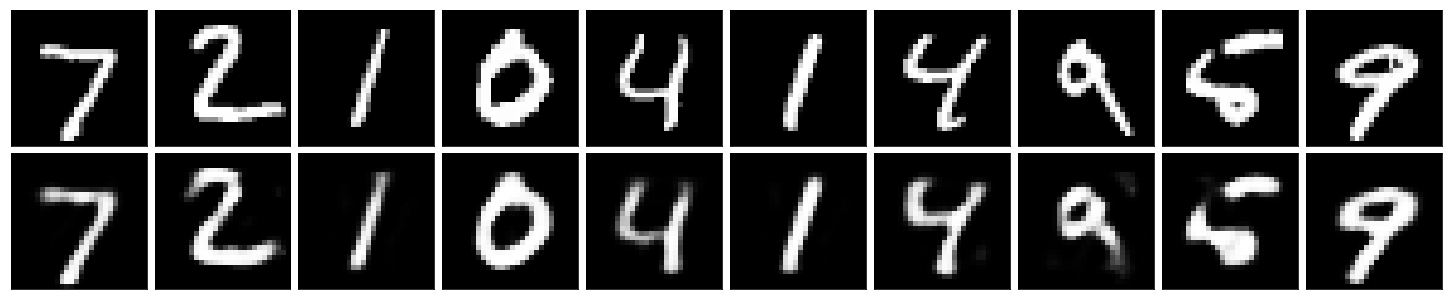

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [ ]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.